# AI ML & DL
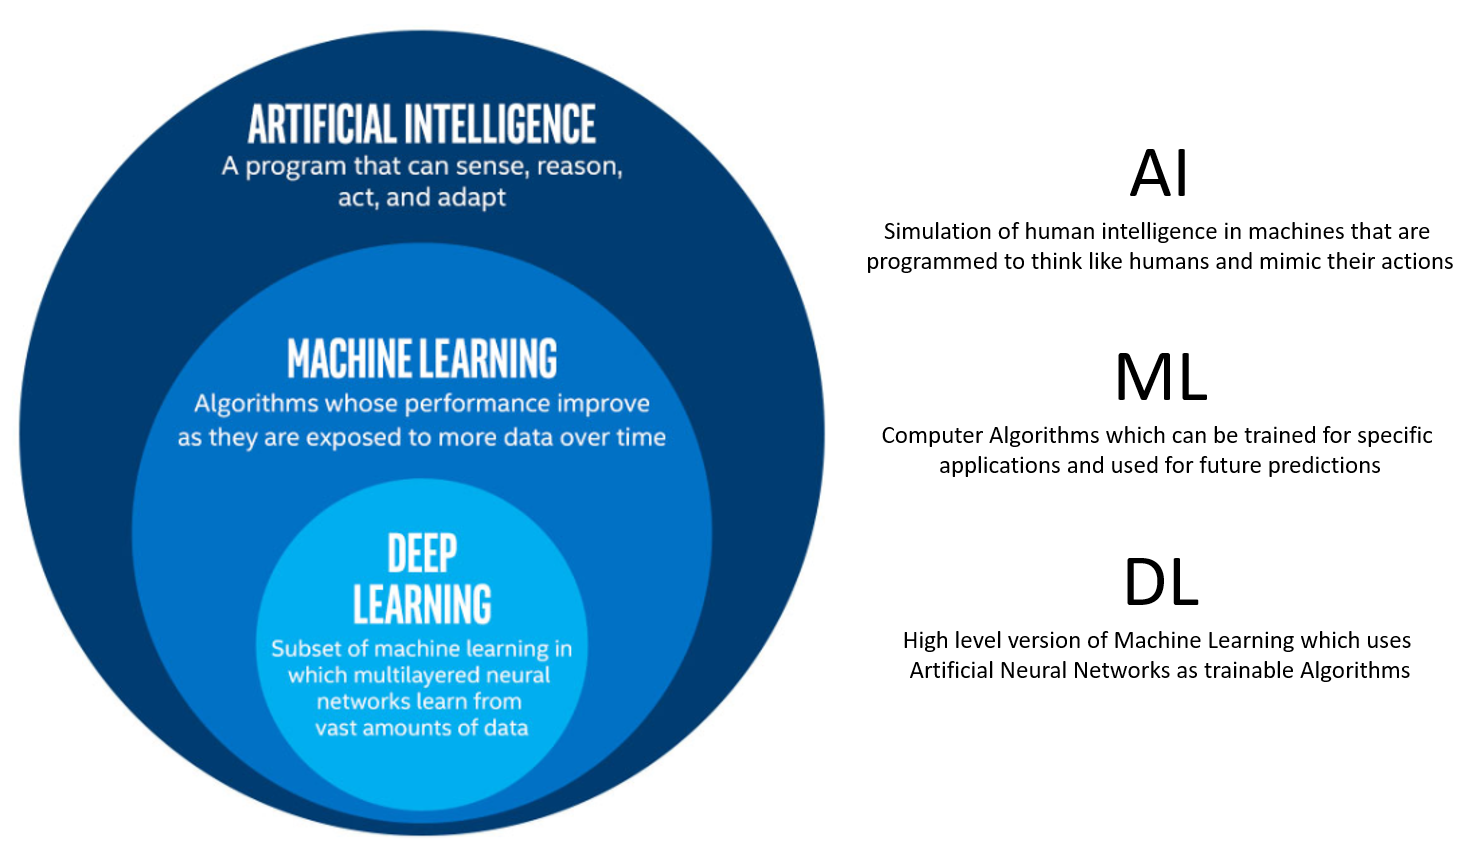

# Bit More about Machine Learning

Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it learn for themselves.

The process of learning begins with observations or data, such as examples, direct experience, or instruction, in order to look for patterns in data and make better decisions in the future based on the examples that we provide. The primary aim is to allow the computers learn automatically without human intervention or assistance and adjust actions accordingly.
[source](https://expertsystem.com/machine-learning-definition/)

## More Mathematical Definition

A program is said to learn from <b>experience E</b> with respect
to <b>task</b> T and <b>performance measure P</b>, if it’s performance at
<b>tasks in T</b>, as measured by <b>P</b>, improves with <b>experience E</b>.

<br>

# Main Categories of ML
<br>

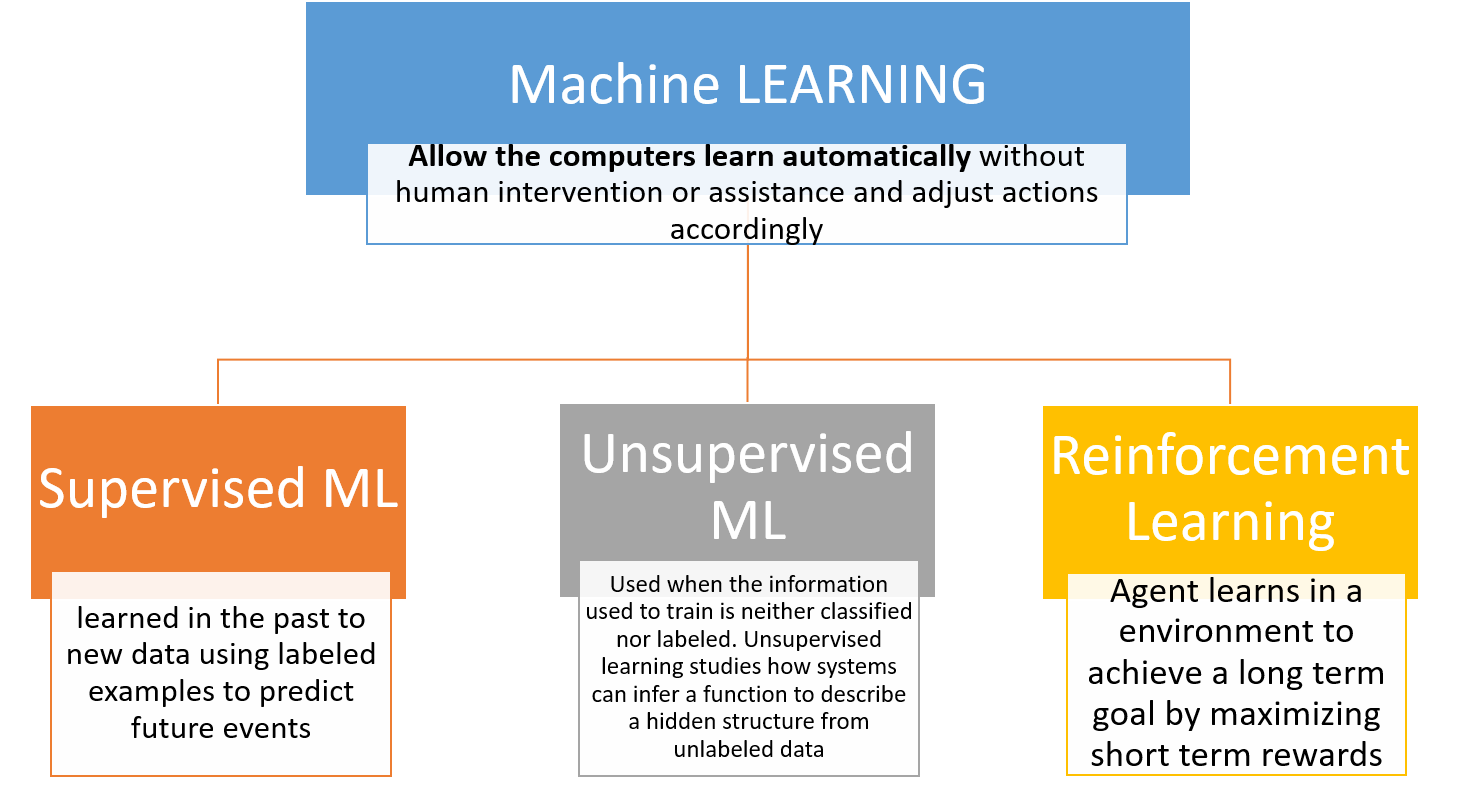

examples: 

1. Supervised: Learn to swim with the guidance of an instructor
2. Unsupervised: Learn to swim by self studying
3. Reinforcement: Dropping off in the middle of the sea to learn swimming

# Supervised ML
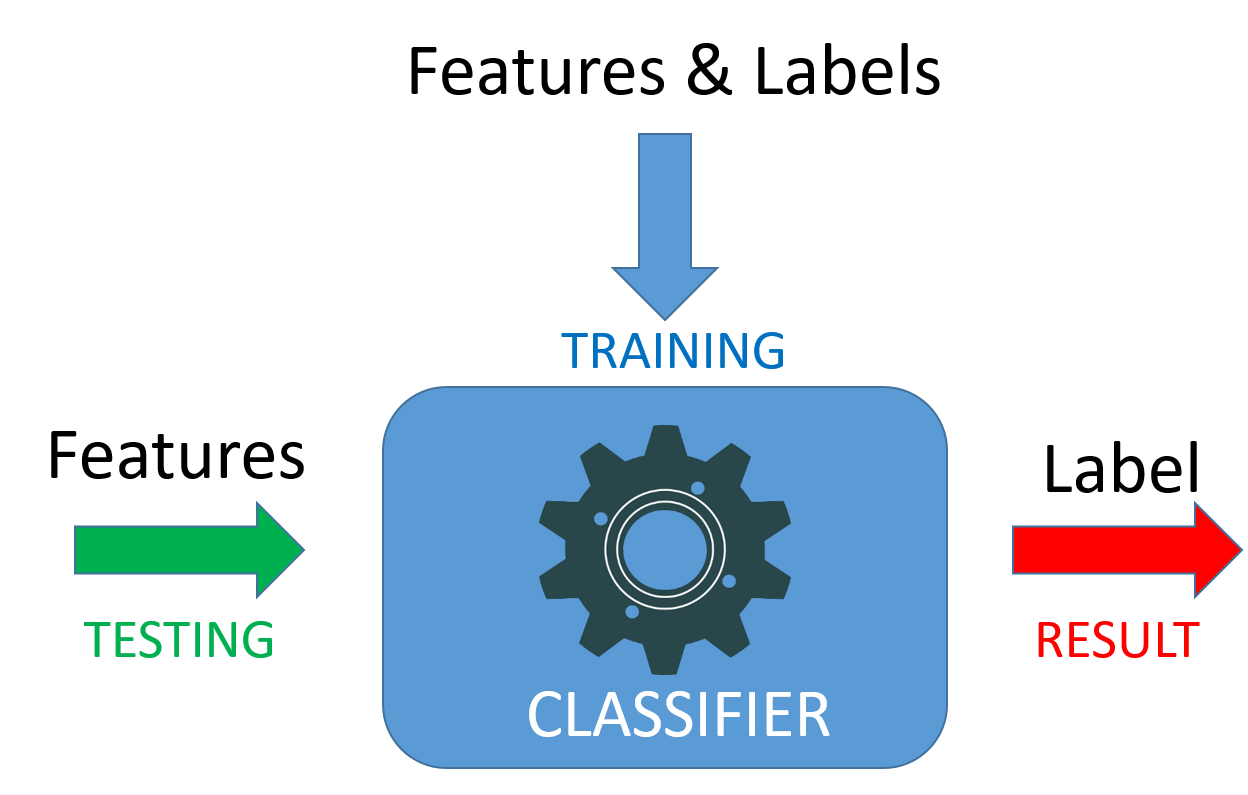

# Features and Labels

# Classification & Regression

1. <b>Classification:</b> “Classification" indicates that the data has discrete class label.
Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y) or classes.
The output variables are often called labels or categories. The mapping function predicts the class or category for a given observation

2. <b>Regression: </b>Regression predictive modeling is the task of approximating a mapping function (f) from input variables (X) to a continuous output variable (y).
A continuous output variable is a real-value, such as an integer or floating point value. These are often quantities, such as amounts and sizes.
For example, a house may be predicted to sell for a specific dollar value, perhaps in the range of $100,000 to $200,000.

## Features and Labels

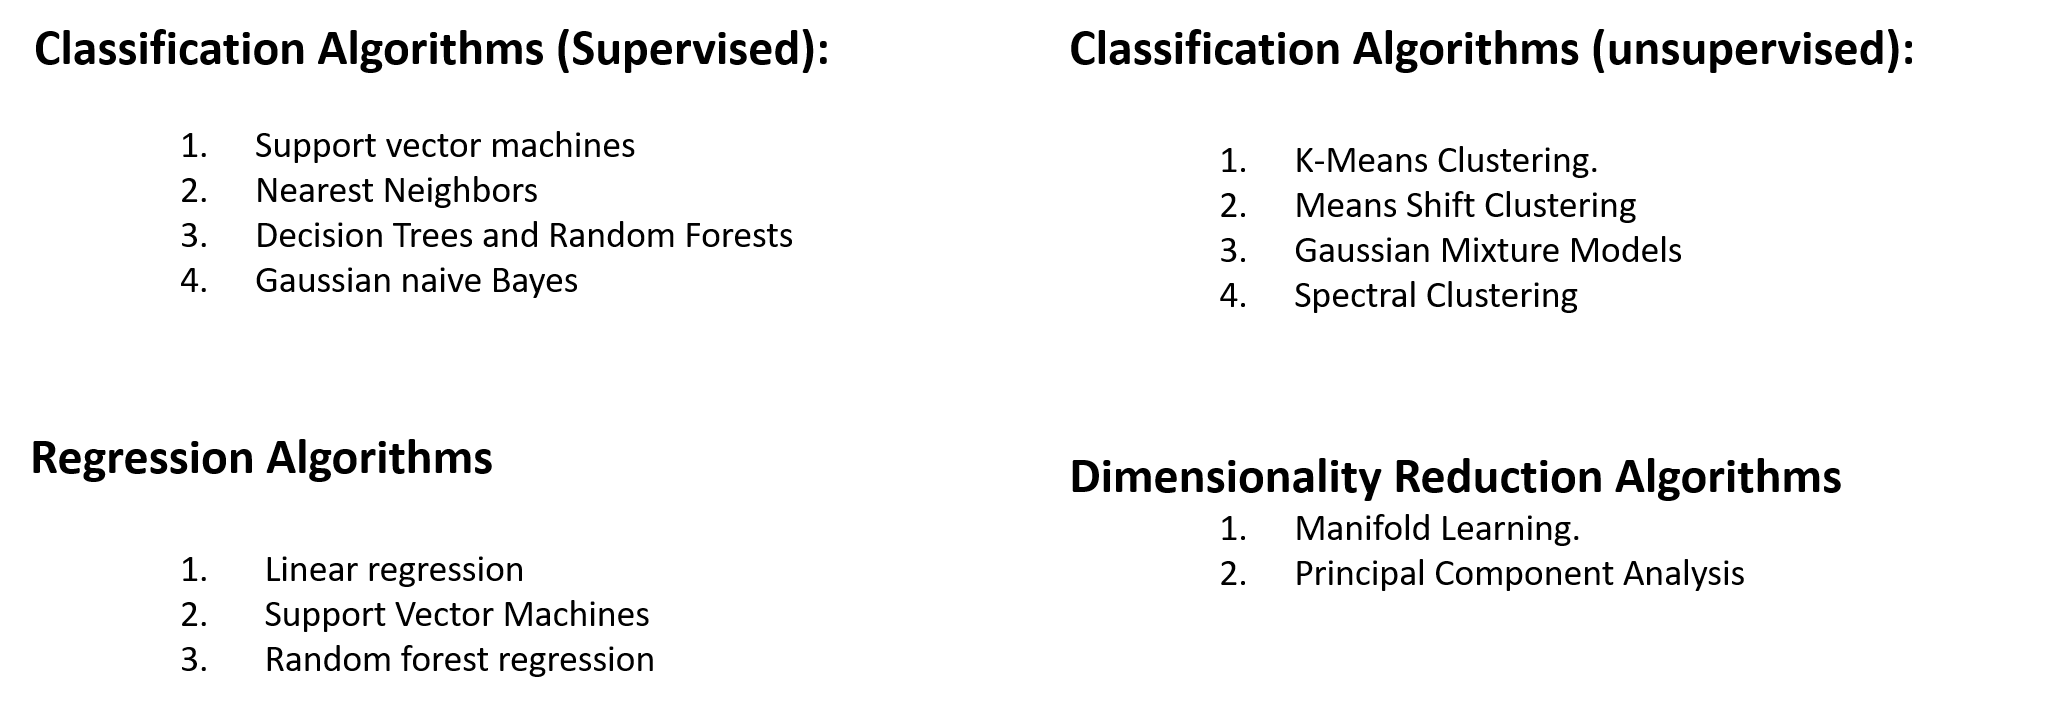

# K Nearest Neighbor Algorithm (Classifier)
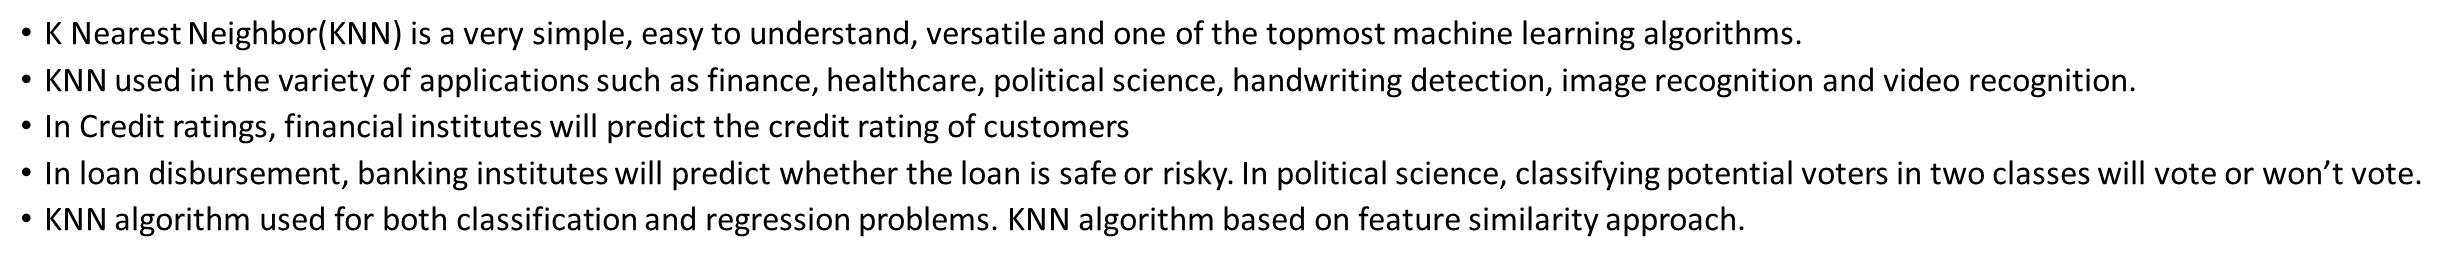

# Lets take a sample dataset

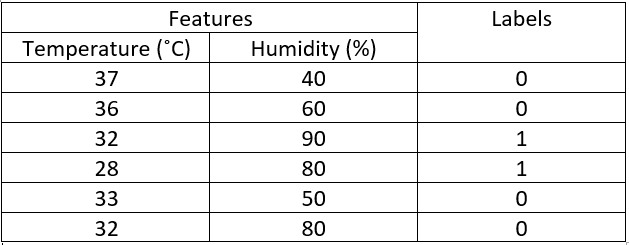

## Training

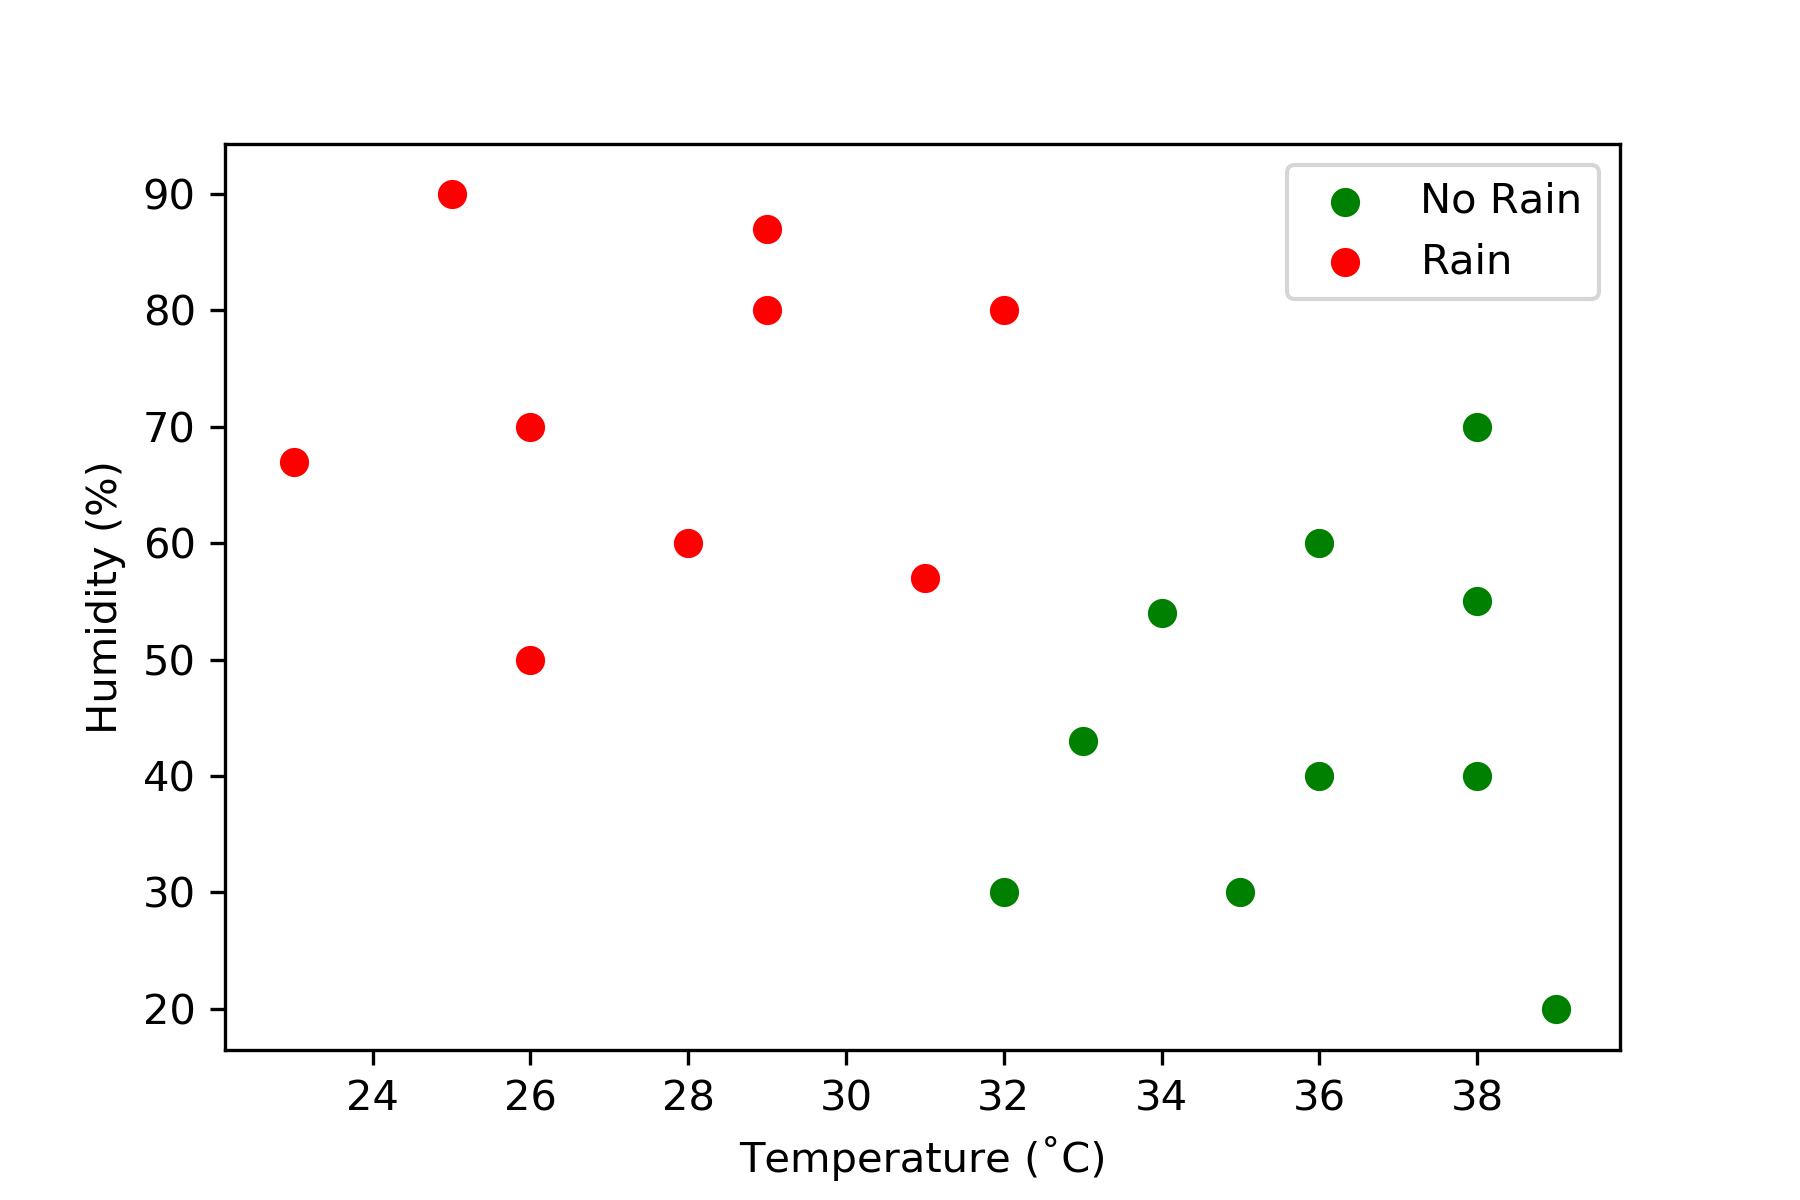

## Tresting Measure Distance to all the Training data
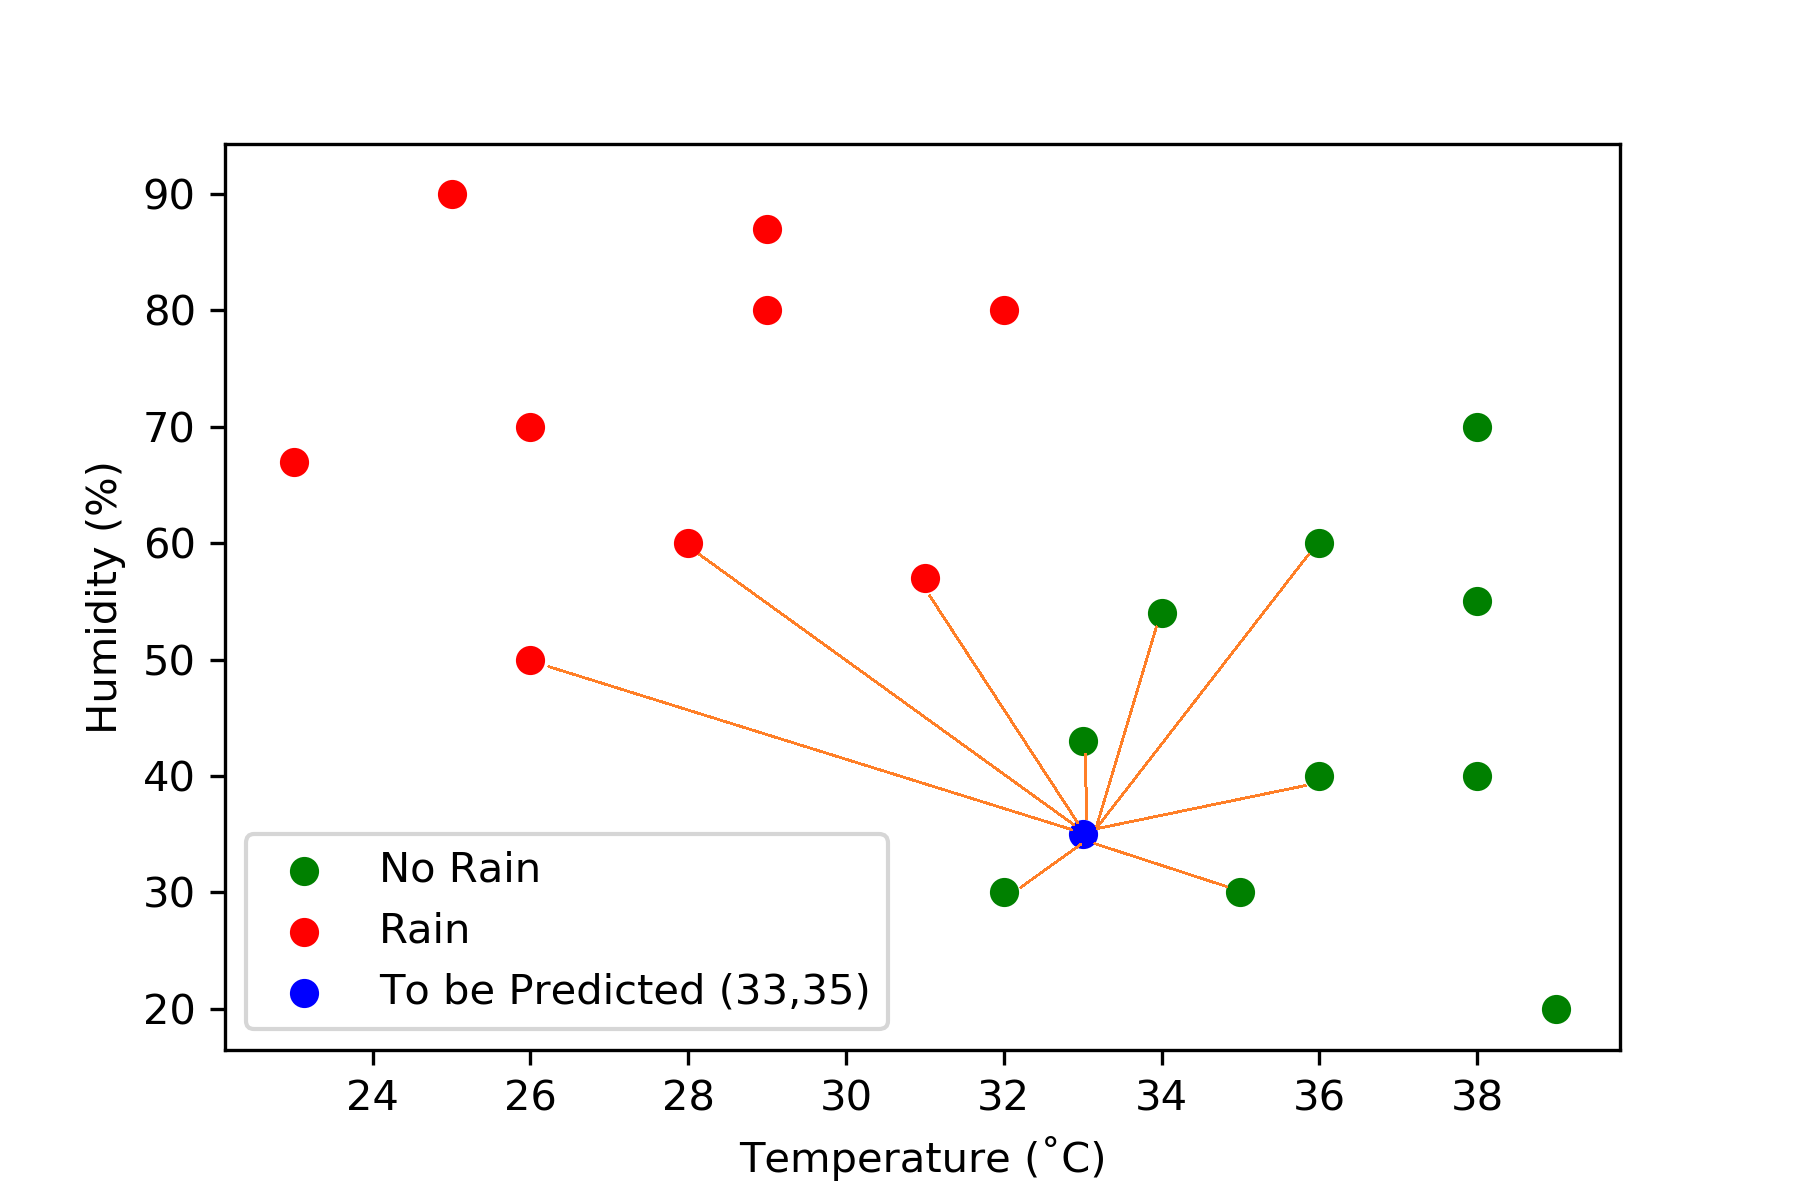

## How to Measure the Distance
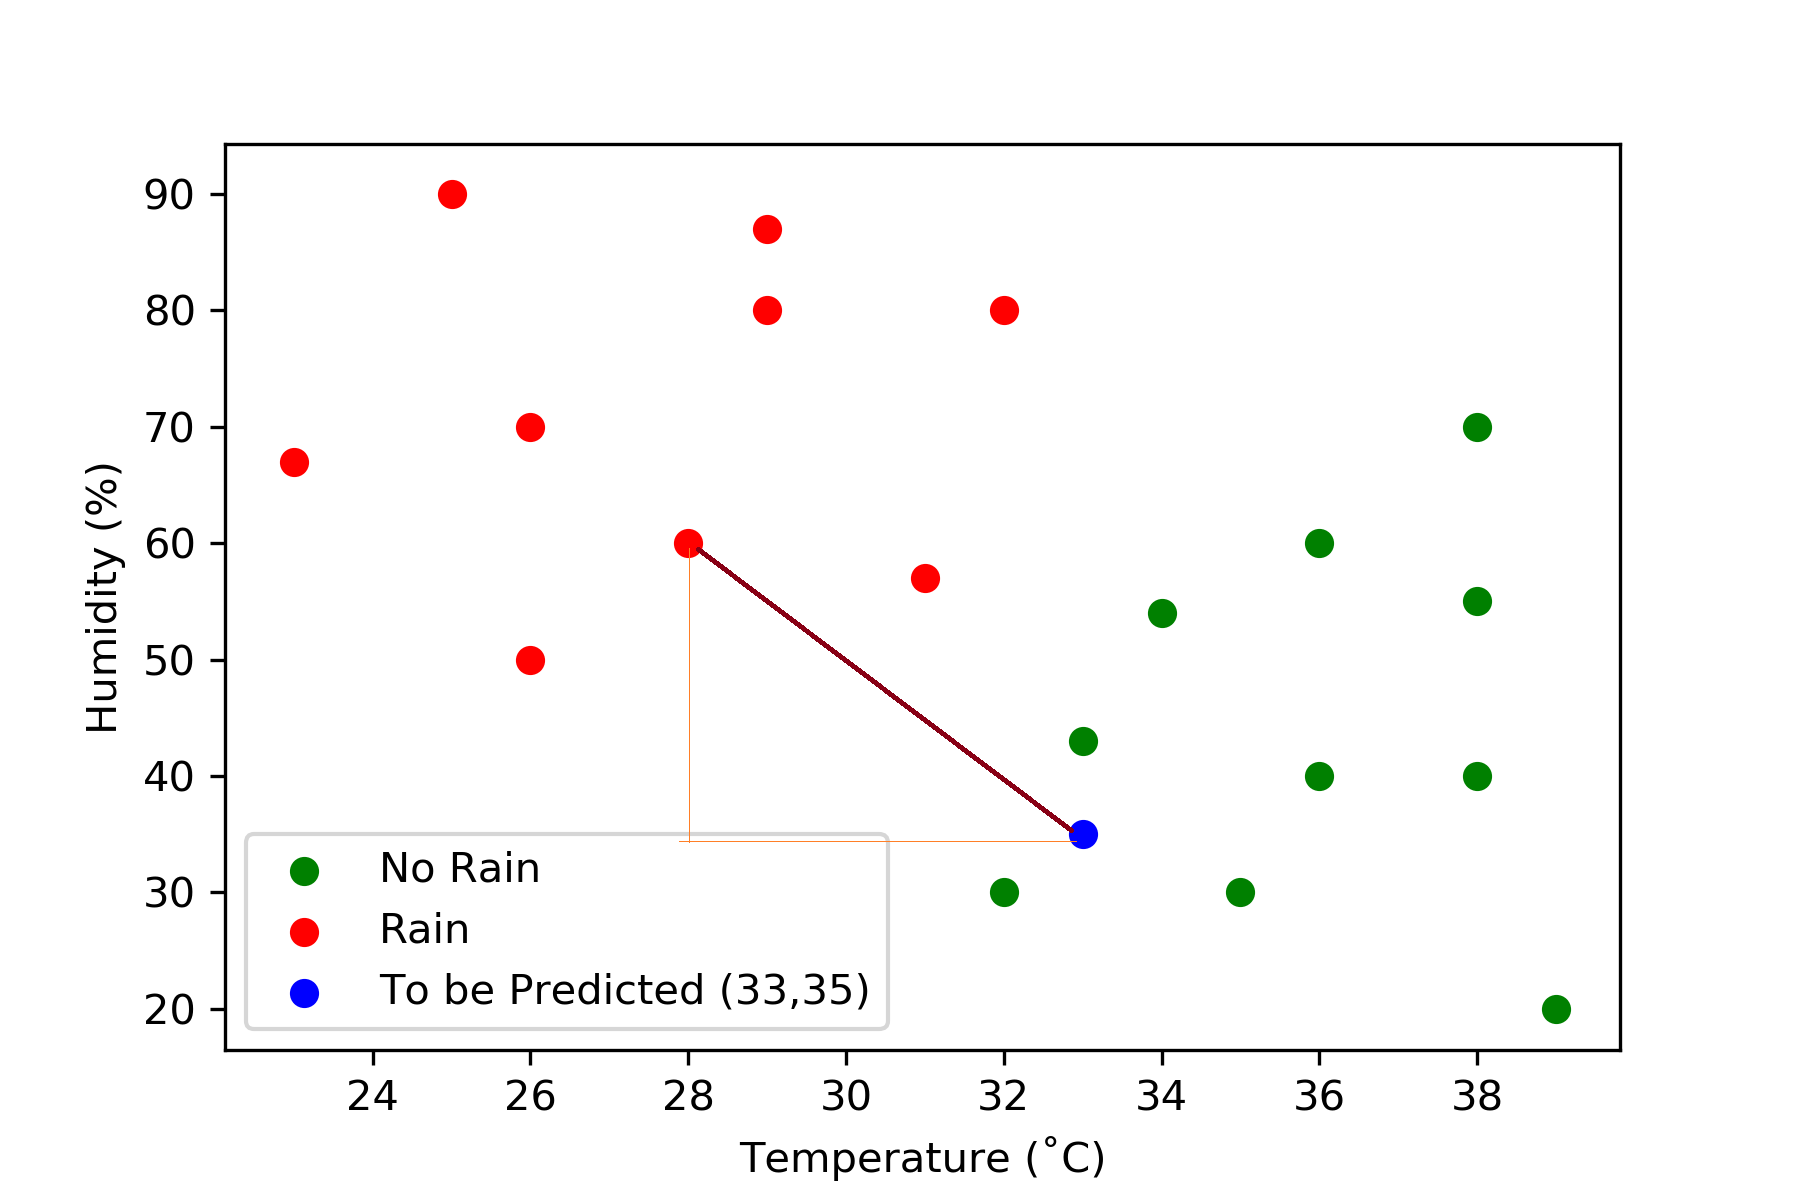

## Nearest Neighbor - Minimum Distance

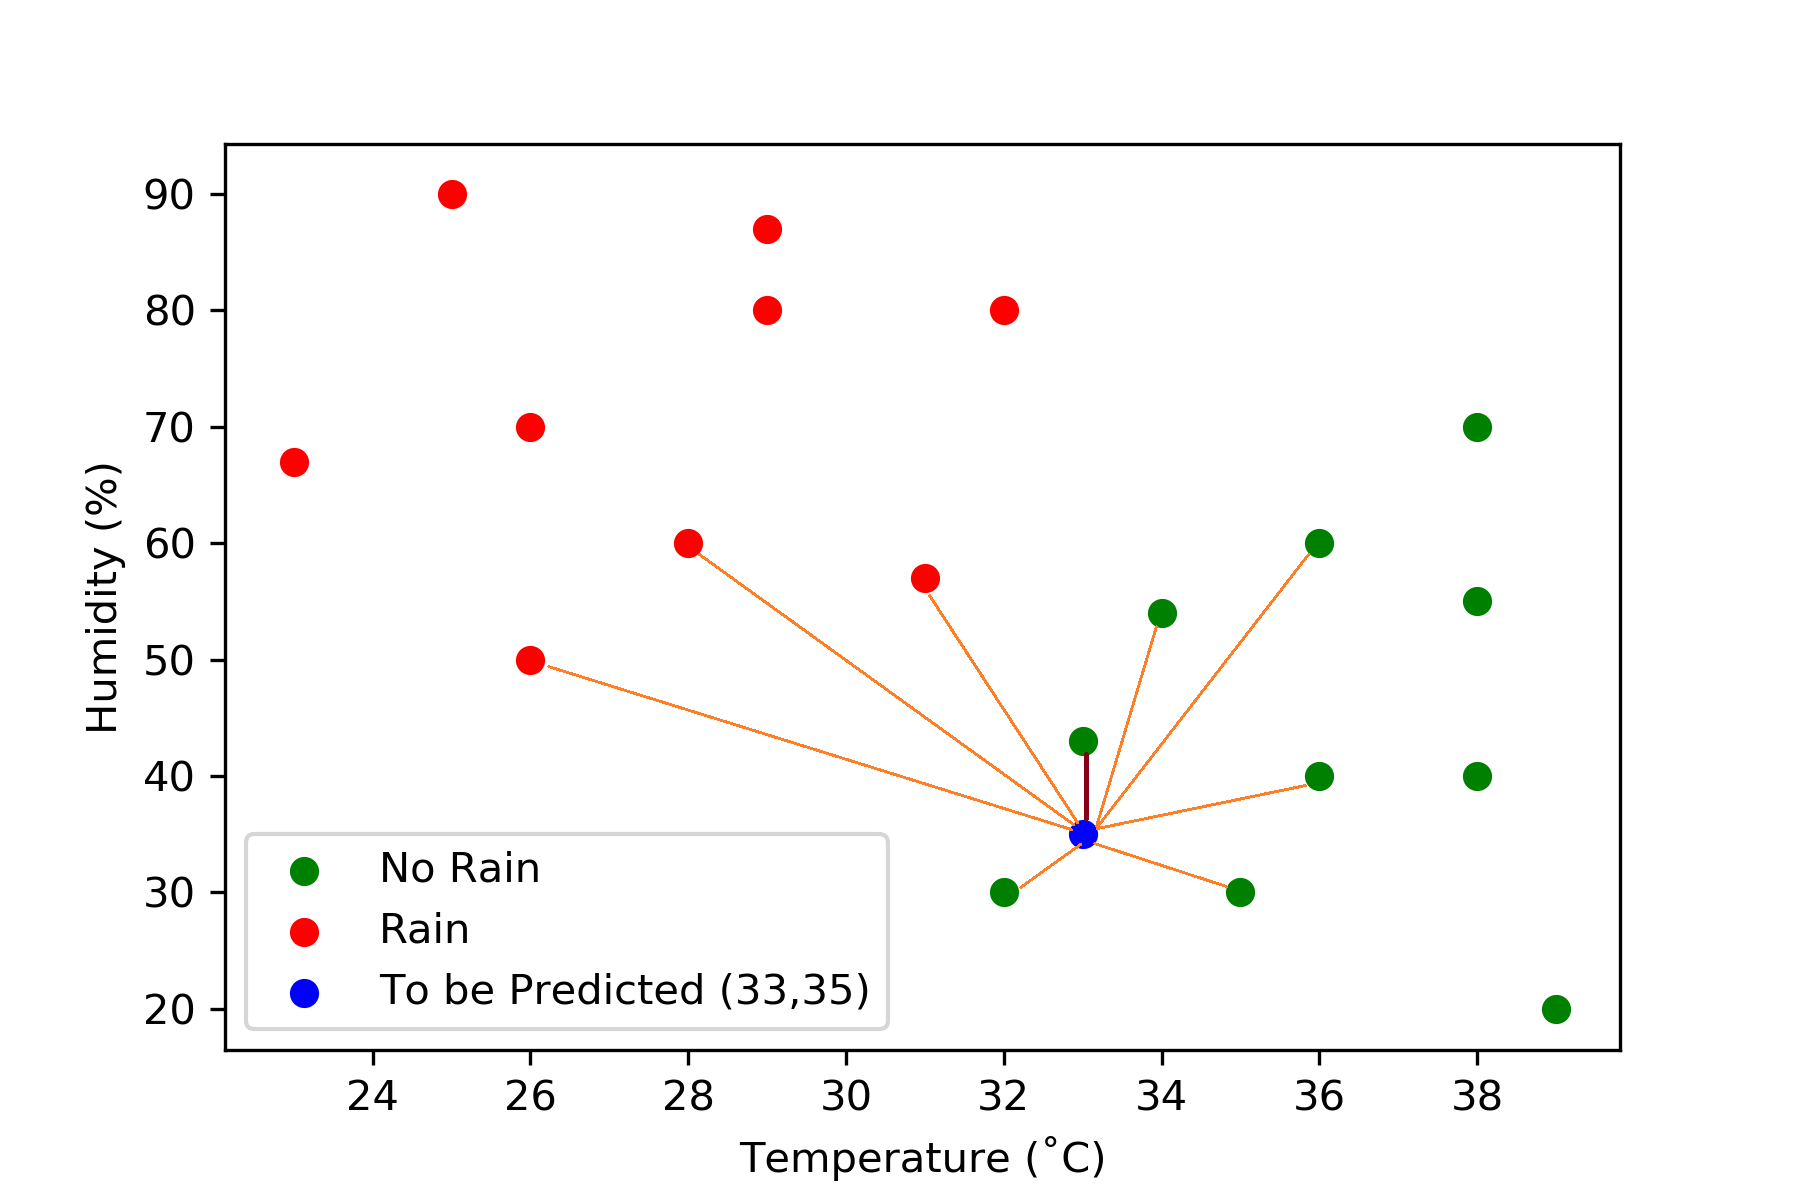

## Euclidean Distance How to deal when there are more than 2 Features
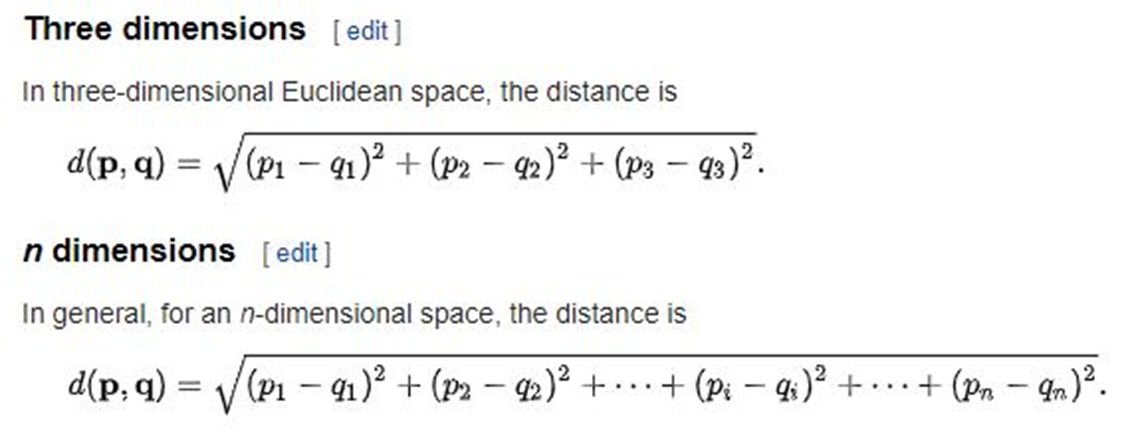

## What to when there is more than 2 Features/ Dimensions
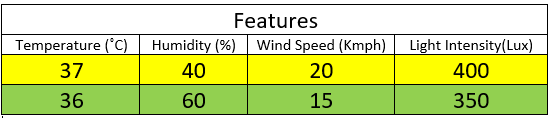

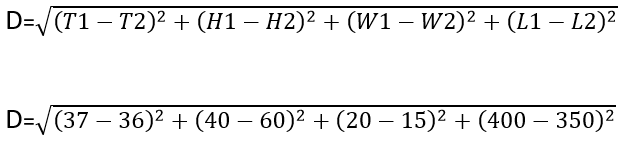

## What is K?

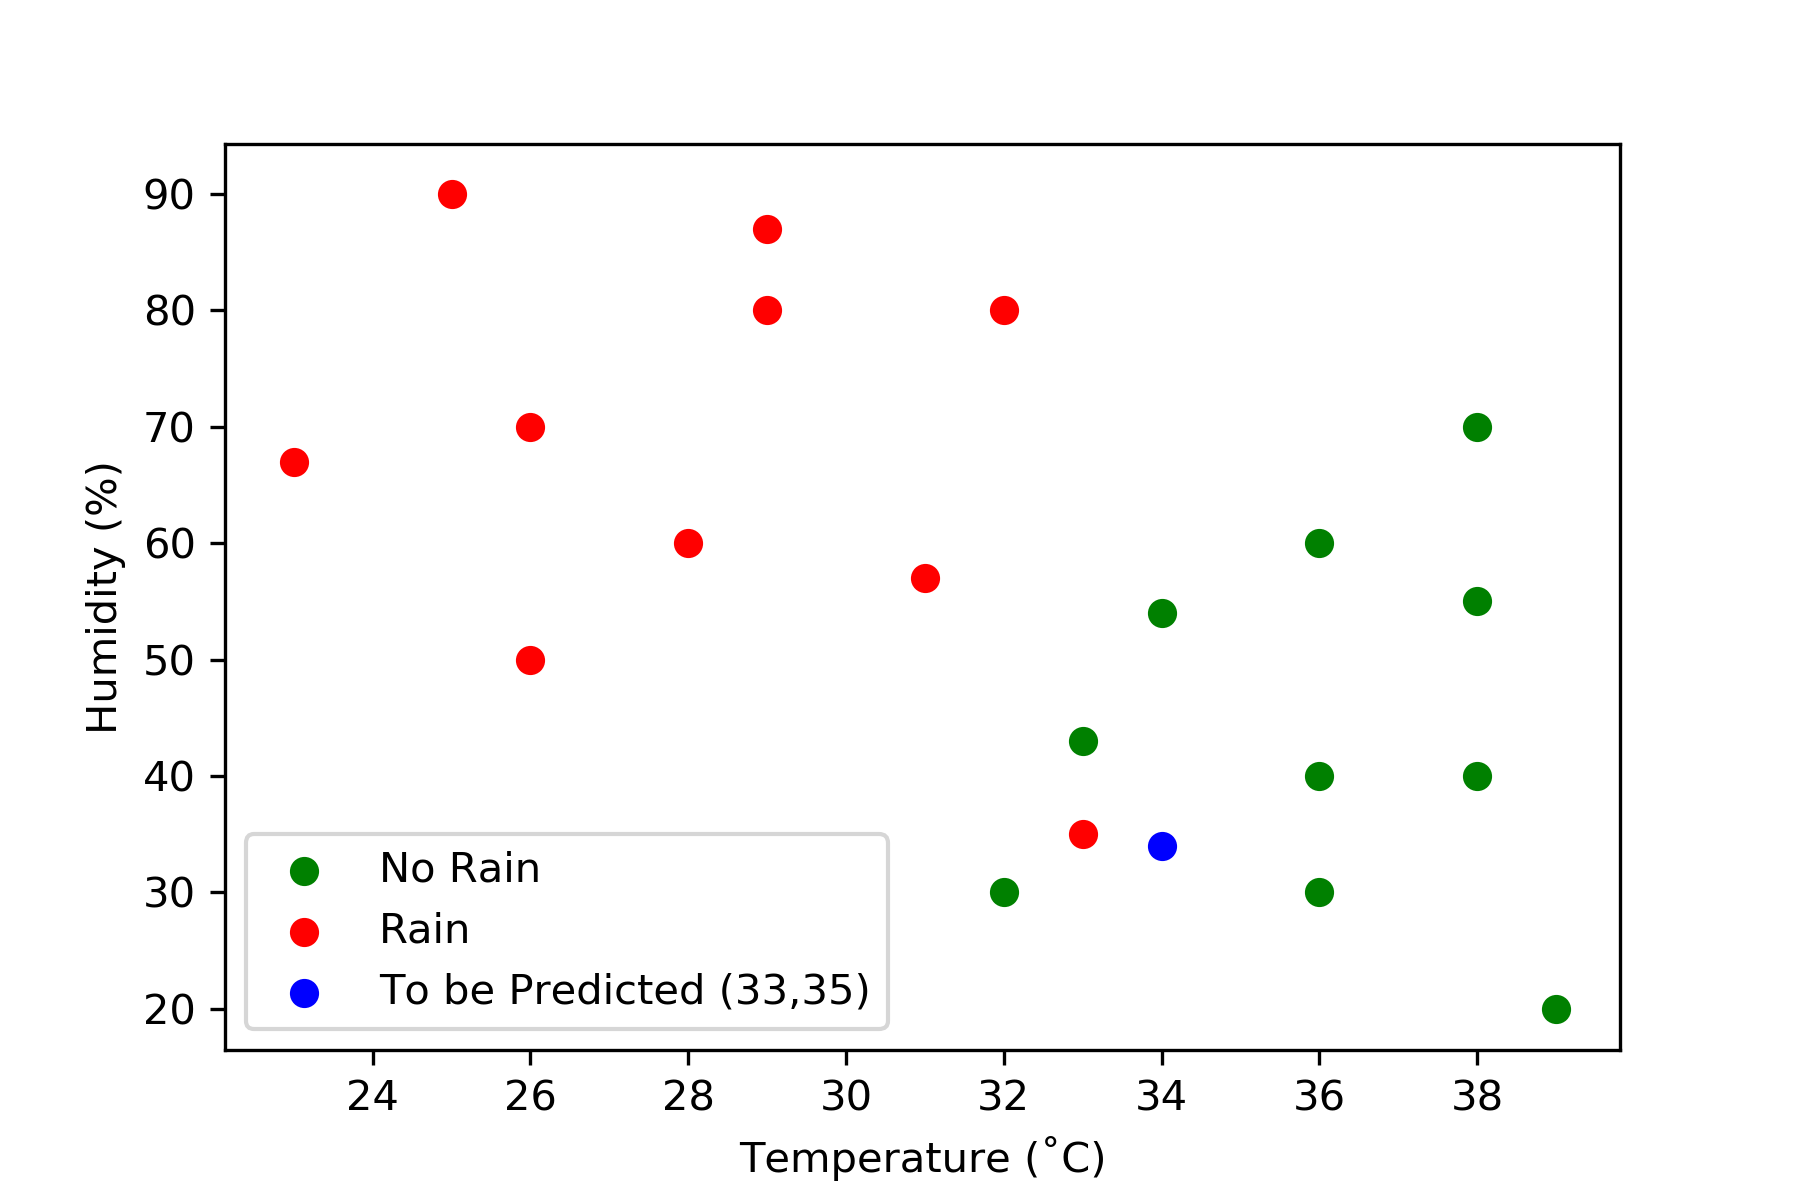

## Vote for labels
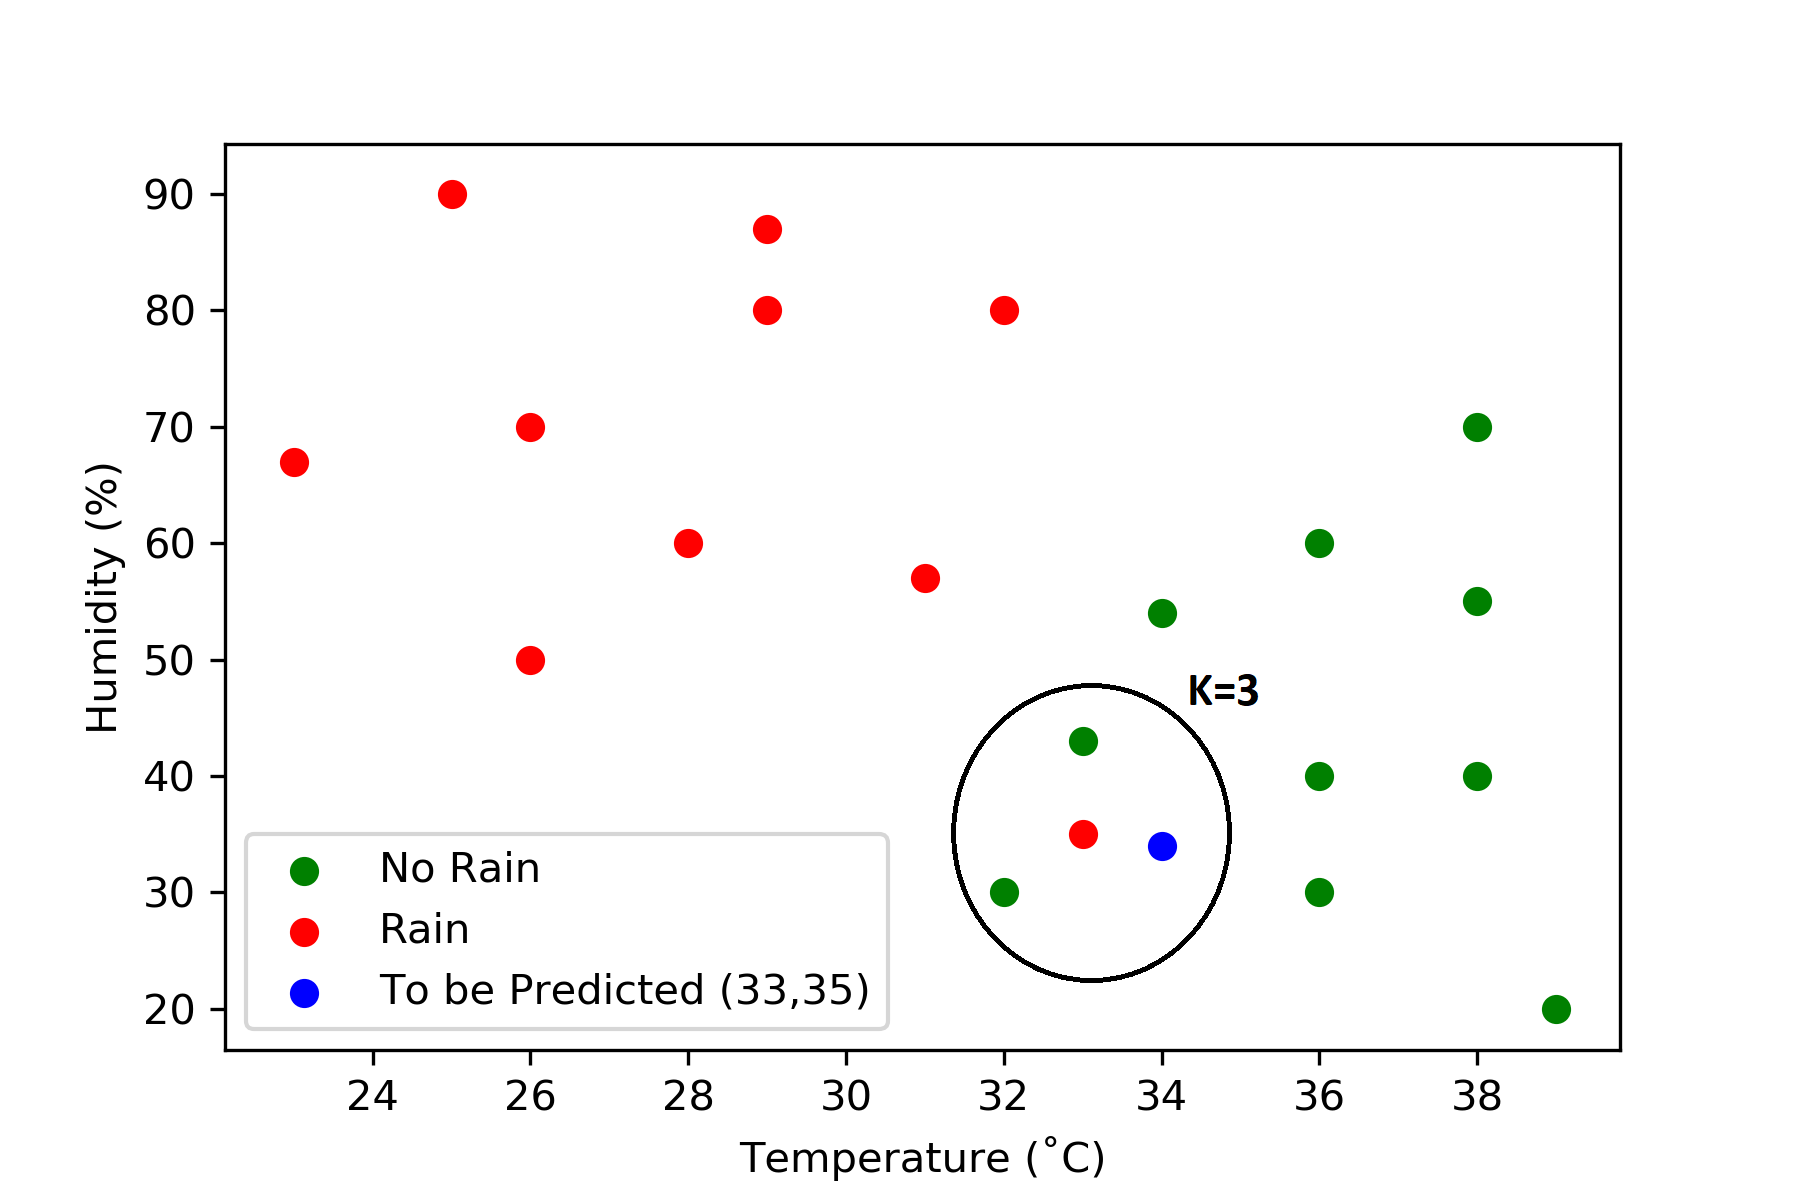

## KNN Algorithm Summary
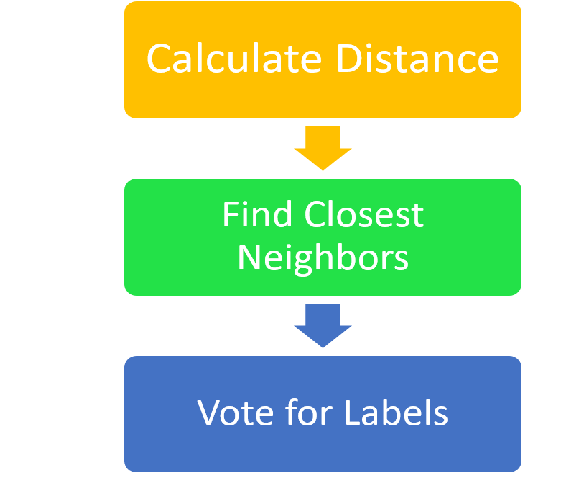

# A Face Detection Pipeline

In this section, we will take a look at one such feature extraction technique, the Histogram of Oriented Gradients (HOG), which transforms image pixels into a vector representation that is sensitive to broadly informative image features regardless of confounding factors like illumination. We will use these features to develop a simple face detection pipeline, using machine learning algorithms and concepts

## HOG Features

The Histogram of Gradients is a straightforward feature extraction procedure that was developed in the context of identifying pedestrians within images. HOG involves the following steps:

1. Optionally pre-normalize images. This leads to features that resist dependence on variations in illumination.
2. Convolve the image with two filters that are sensitive to horizontal and vertical brightness gradients. These capture edge, contour, and texture information.
3. Subdivide the image into cells of a predetermined size, and compute a histogram of the gradient orientations within each cell.
4. Normalize the histograms in each cell by comparing to the block of neighboring cells. This further suppresses the effect of illumination across the image.
5. Construct a one-dimensional feature vector from the information in each cell.
A fast HOG extractor is built into the Scikit-Image project, and we can try it out relatively quickly and visualize the oriented gradients within each cell:

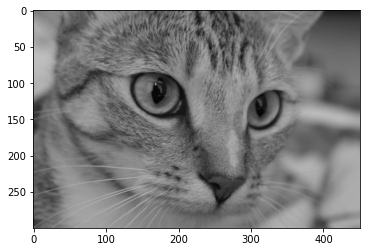

In [4]:
import cv2
from matplotlib import pyplot as plt

img=cv2.imread('samples/cat.jpg')
plt.imshow(img,cmap='gray')

27

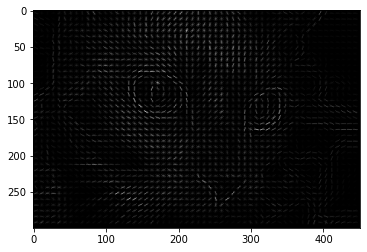

In [39]:
from skimage import feature

hog_vec, hog_vis = feature.hog(image, visualize=True)
plt.imshow(hog_vis,cmap='gray')
#cv2.imshow('hog_vis',hog_vis)
#cv2.waitKey(0)

## Face Detector

Using these HOG features, we can build up a simple facial detection algorithm with any Scikit-Learn estimator; here we will use a linear support vector machine (refer back to In-Depth: Support Vector Machines if you need a refresher on this). The steps are as follows:

1. Obtain a set of image thumbnails of faces to constitute "positive" training samples.
2. Obtain a set of image thumbnails of non-faces to constitute "negative" training samples.
3. Extract HOG features from these training samples.
4. Train a linear SVM classifier on these samples.
5. For an "unknown" image, pass a sliding window across the image, using the model to evaluate whether that window contains a face or not.
6. If detections overlap, combine them into a single window.

In [21]:
import os 
import numpy as np

data_path='dataset'

categories=os.listdir(data_path)
print(categories)
labels=np.arange(len(categories))
print(labels)
label_dict=dict(zip(categories,labels))
print(label_dict)

['negative', 'positive']
[0 1]
{'negative': 0, 'positive': 1}


In [27]:
import cv2

data=[]
target=[]

for category in categories:

    imgs_path=os.path.join(data_path,category)
    print(imgs_path)
    img_names=os.listdir(imgs_path)

    for img_name in img_names:
        
        try:
        
            img_path=os.path.join(imgs_path,img_name)

            img=cv2.imread(img_path)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            data.append(img)
            target.append(label_dict[category])
        
        except Exception as e:
            
            print(img_path,e)

dataset\negative
dataset\positive


In [36]:
data_new=np.array(data)
#data_new=data_new.reshape(data_new.shape[0],data_new.shape[1]*data_new.shape[2])
target_new=np.array(target)

In [37]:
print(data_new.shape)
print(target_new.shape)

(43233, 62, 47)
(43233,)


In [38]:
np.save('data',data_new)
np.save('target',target_new)